# Reseau neuronal

In [93]:
# j'importe les bibliotheques...........

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [60]:

# Je charge les 2 dataframe train et test

train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')



In [61]:
# je visualise les données d'entrainement................

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# je visualise le nombre de lignes et de colonnes...........
# 891 lignes et 12 colonnes

train.shape

(891, 12)

In [63]:
# je visualise les données de test.......
# remarque: il manque la colonne - Survived -


test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
# je visualise le nombre de lignes et de colonnes.........
# 418 lignes et 11 colonnes.
# remarque: il manque la colonne - Survived -
# c'est la cible ou target à prédire.

test.shape

(418, 11)

In [65]:
# je supprime les colonnes inutiles des ensembles de train et test

train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)
train = train.drop('Cabin', axis=1)



test = test.drop('Name', axis=1)
test = test.drop('Ticket', axis=1)
test = test.drop('Cabin', axis=1)



In [66]:
# Je visualise les modifications......

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [67]:
# Je visualise les modification dans les données de test

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [68]:
# je code les variables catégorielles pour train et test

train = pd.get_dummies(train, columns=["Sex", "Embarked"])

test = pd.get_dummies(test, columns=["Sex","Embarked"])

train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [69]:
# Je visualise les modification dans les données de test

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [70]:
# j'isole la variable à expliquer ici - Survived -  des variables explicatives

X = train.drop("Survived", axis=1)
y = train["Survived"] # cible



In [71]:
# je visualise le résultat............

X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,3,NaN,1,2,23.4500,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,0,1,1,0,0


In [72]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [73]:
# Je Normalise les variables explicatives X ..............
# Scaler Min-Max

from sklearn.preprocessing import MinMaxScaler

col_names = X.columns
features = X[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_X = pd.DataFrame(features, columns = col_names)
scaled_X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.001124,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,0.002247,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.003371,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,0.004494,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0


In [74]:
# Je normalise les données de test................
# Scaler Min-Max

from sklearn.preprocessing import MinMaxScaler

col_names = test.columns
features = test[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_test = pd.DataFrame(features, columns = col_names)
scaled_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.452723,0.000,0.000000,0.015282,0.0,1.0,0.0,1.0,0.0
1,0.002398,1.0,0.617566,0.125,0.000000,0.013663,1.0,0.0,0.0,0.0,1.0
2,0.004796,0.5,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,1.0,0.0
3,0.007194,1.0,0.353818,0.000,0.000000,0.016908,0.0,1.0,0.0,0.0,1.0
4,0.009592,1.0,0.287881,0.125,0.111111,0.023984,1.0,0.0,0.0,0.0,1.0


In [77]:
# je verifie si il y a des données nan pour les variables explicatives scaled_X données d entrainement

scaled_X.isnull().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [78]:
# # je verifie si il y a des données nan pour les variables explicatives scaled_test données de test

scaled_test.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [79]:
# Pour les données de test 
# Je remplace les valeurs manquantes des colonnes par la moyenne de la colonne
# ici - Age - et -Fare -

scaled_test = scaled_test.fillna(value=scaled_test['Age'].mean())
scaled_test = scaled_test.fillna(value=scaled_test['Fare'].mean())

# Je  vérifie les modifications.....

scaled_test.isnull().sum()


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [80]:
# Je remplace les valeurs manquantes de colonne par la moyenne de la colonne

scaled_X = scaled_X.fillna(value=scaled_X['Age'].mean())
scaled_X = scaled_X.fillna(value=scaled_X['Fare'].mean())

# Je vérifie les modifications..............

scaled_X.isnull().sum()


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [43]:
# 
#from sklearn.model_selection import train_test_split

# pd.options.mode.chained_assignement
# None, ignore l'avertissement
# warn, impression d'un message d'avertissement
# raise, soulevant d'une exception

#pd.options.mode.chained_assignment = None

# supprime des lignes ou colonnes valeurs manquantes NaN 
#cleaned_titanic_df = train_df.dropna()

# Selectionne les caractéristiques de la variable cible.
# variables explicatives, la variable à expliquer
#X = cleaned_titanic_df[['Pclass', 'Age', 'Fare', 'Sex']]
#y = cleaned_titanic_df['Survived']

# Pour Convertir la colonnes Sex en valeurs numériques (0 pour male, 1 pour female)
#X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Splitting the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [15]:
#from sklearn.metrics import accuracy_score



#def print_accuracy_score(y_test, y_pred):
#  accuracy = accuracy_score(y_test, y_pred)
#  print("Accuracy: ", accuracy)


In [98]:
vectorisation_X=np.asarray(scaled_X)


In [97]:
vectorisation_y=np.asarray(y)

In [139]:
import tensorflow as tf

# Architecture du model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=[11]),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compilation du model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])


# Pour entrainer le model
history=model.fit(vectorisation_X, vectorisation_y, epochs=10)



# Pour faire de prédictions sur les données de test
#predictions = model.predict(scaled_X_test)

# Aplatir le tableau de prédictions en un tableau unidimensionnel
#predictions = predictions.ravel() # equivalent à reshape -1


Epoch 1/10
28/28 [==============================] - 0s 1ms/step - loss: 0.7070 - binary_accuracy: 0.4153
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_accuracy: 0.6195
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6252 - binary_accuracy: 0.6689
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5907 - binary_accuracy: 0.7138
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5610 - binary_accuracy: 0.7767
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5367 - binary_accuracy: 0.7823
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5172 - binary_accuracy: 0.7868
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5021 - binary_accuracy: 0.7901
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 0.4908 - binary_accuracy: 0.7901
Epoch 10/10
28/28 [==============================] - 0s

In [140]:
resultats = model.evaluate(scaled_X,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.4780 - binary_accuracy: 0.7901


<AxesSubplot:title={'center':'Loss and Accuracy'}>

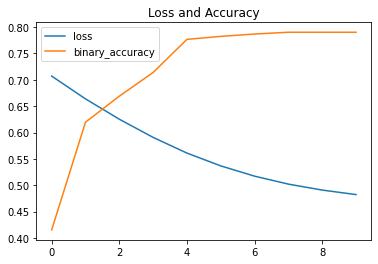

In [146]:
# Je trace la perte et la précision 

pd.DataFrame(history.history).plot(title="Loss and Accuracy")

In [142]:
# Enregistrement du modele dans un fichier .hdf5

model.save('model1.hdf5')

In [147]:
# ça marche

prediction = model.predict(scaled_test)
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = prediction
submission.loc[submission['Survived']>=0.5, 'Survived'] = 1
submission.loc[submission['Survived']<0.5, 'Survived'] = 0
submission.Survived = submission.Survived.astype(int)



In [148]:
submission.Survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [149]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [150]:
# je sauvegarde le fichier au format csv

submission.to_csv('gender_submission3.csv',index=False)